# Linear Algebra with Numpy: Part 1

Linear algebra is the branch of mathematics concerning linear equations such as:

$$a_{1}x_{1}+\cdots +a_{n}x_{n}=b$$ 
$$a_{1}x_{1}+\cdots +a_{n}x_{n}=b$$
linear maps such as:

$$(x_{1},\ldots ,x_{n})\mapsto a_{1}x_{1}+\cdots +a_{n}x_{n} $$ $$(x_{1},\ldots ,x_{n})\mapsto a_{1}x_{1}+\cdots +a_{n}x_{n}$$
and their representations in vector spaces and through matrices.

Linear algebra is central to almost all areas of mathematics. For instance, linear algebra is fundamental in modern presentations of geometry, including for defining basic objects such as lines, planes and rotations. Also, functional analysis, a branch of mathematical analysis, may be viewed as the application of linear algebra to spaces of functions.<sup>1</sup>

Linear algebra is also a key ingridient in understanding machine learning algorithms. The most common and well known example is linear regression. If you have used a machine learning tool or library, the most common way of solving linear regression is via a least squares optimization that is solved using matrix factorization methods from linear regression, such as an LU decomposition or a singular-value decomposition, or SVD.

Even the common way of summarizing the linear regression equation uses linear algebra notation:

`y = A . b`
Where y is the output variable A is the dataset and b are the model coefficients.<sup>2</sup>

In this three part series I will outline the use of numpy and scipy to solve some basic linear algebra problems in python. In the first part, we will start with vectors & matrices and how they are represented using numpy, some basic addition, scalar multiplication, dot and cross products using numpy, and finally end with matrix-vector & matrix-matrix multiplications. 


## Part 1: Vectors and Matrices in numpy

In [1]:
# importing the numpy library
import numpy as np 

The first question you might have is what is a vector? A vector is simply a list of numbers. You can interpret those in one of two ways: One way is to think of a vector as identifying a point in space. Another way to think about it is as a magnitude and direction. Vectors can be of any length and represent a multitude of things.<sup>3</sup>


In numpy, we represent vectors as arrays. 

For example if we want to represent a vector, lets call it $\hat{x}$ which equals [2,6]. In graphical representation it might look like this:

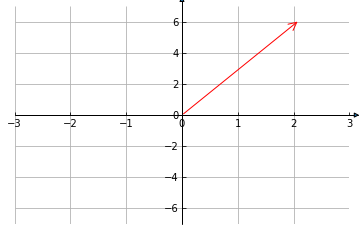

<b> Figure 1</b>

In numpy, we use arrays to store vectors and matrices. Vectors are called 1D arrays, Matrices are 2D arrays and you can store on another axis and create a 3D array. 

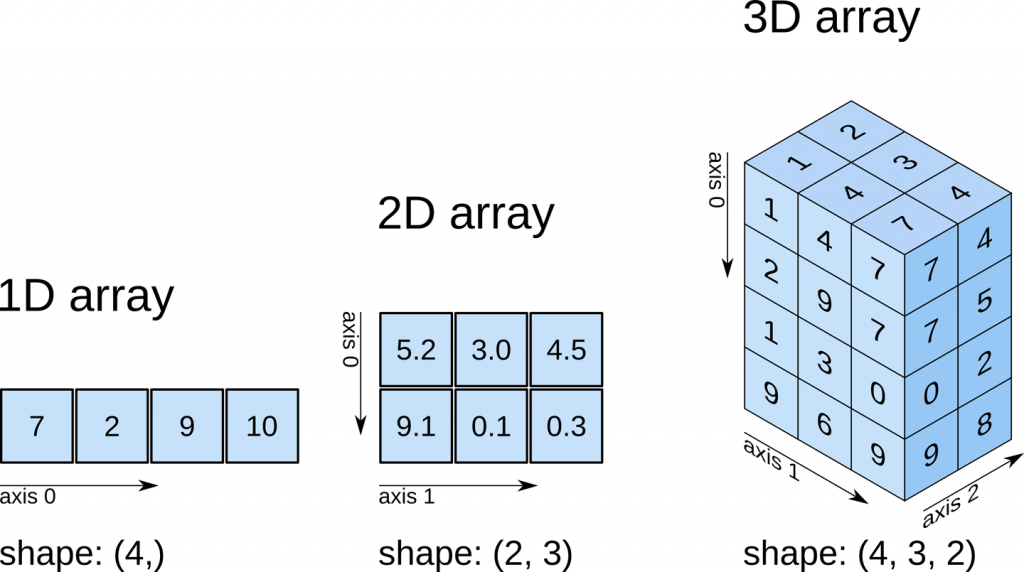


There are 6 general mechanisms for creating arrays:<sup>4</sup>

1. Conversion from other Python structures (i.e. lists and tuples)

2. Intrinsic NumPy array creation functions (e.g. arange, ones, zeros, etc.)

3. Replicating, joining, or mutating existing arrays

4. Reading arrays from disk, either from standard or custom formats

5. Creating arrays from raw bytes through the use of strings or buffers

6. Use of special library functions (e.g., random)

For our example of $\hat{x}$, we will create a list first and then convert it to a 1D array. 

In [2]:
x_hat = [2,6]
numpy_x_hat = np.array(x_hat)

In [3]:
print("Type of x_hat is: {}".format(type(x_hat)))
print("Type of numpy_x_hat is: {}".format(type(numpy_x_hat)))

Type of x_hat is: <class 'list'>
Type of numpy_x_hat is: <class 'numpy.ndarray'>


Now let's say we want to create a 2x2 matrix. Let's call it $A_{2,2} = \begin{pmatrix} 2 & 2 \\ 2 & 2 \end{pmatrix}$

In numpy, we can use lists again to create a matrix. But this time instead of just one list, we create a list for every row in the matrix.

In [4]:
r1 = [2,2]
r2 = [2,2]

numpy_A_22 = np.array([r1,r2])

print(numpy_A_22)

[[2 2]
 [2 2]]


In [5]:
print(numpy_A_22.shape)

(2, 2)


In [6]:
print(numpy_x_hat.shape)

(2,)


You can use the `.shape` function to find the dimensions of your array.

Some other important numpy functions that you can use to initialize arrays are:

1. `np.empty`: Return a new array of given shape and type, without initializing entries. 
2. `np.ones`: Return a new array of given shape and type, filled with ones.
3. `np.zeros`: Return a new array of given shape and type, filled with zeros.

## Part 2: Vector addition, multiplication, unit vectors and dot & cross products 

An important part of linear algebra is the notion of vector addition and vector multiplication. 

For two vectors `u` and `v` in $R^{2}$, we can add or subtract them to form new vectors, lets call it `w`. 

### Adding two vectors

For example,lets say 

$\mathbf{u}=\langle 2,4 \rangle$ and $\mathbf{v}=\langle 4,1 \rangle$ 

$\mathbf{u+v} = \mathbf{w} = \langle 2+4, 4+1 \rangle = \langle 6,5 \rangle$

Graphically it can be represented like this:

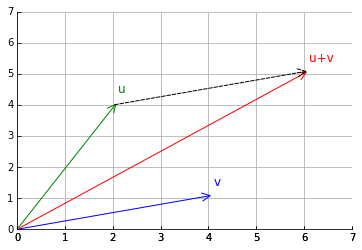

<b>Figure 2</b>

The way we would calculate this using numpy is:

In [7]:
u = np.array([2,4])
v = np.array([4,1])
w = u+v

print(w)

[6 5]


### Scaling a vector

You can scale a vector as well. For example, let's take `u` from the previous example and scale it by a factor of 3. 

So `3u` would be $\langle 3*2, 3*4 \rangle = \langle 6,12 \rangle$ 

And graphically that would be:

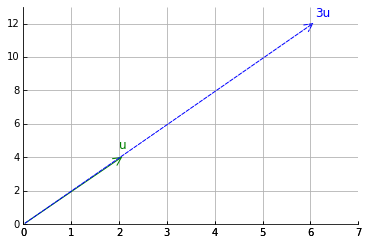

<b> Figure 3 </b>

And in numpy you would solve it like this:

In [8]:
u = np.array([2,4])
print(3*u)

[ 6 12]


### Unit Vectors 

Like previously defined, a vector has a magnitude and direction. A unit vector is nothig but a vector that has a magnitude of 1. In numpy you can use the `linalg.norm` function to find the magnitude of any numpy array. 

For example, $\hat{u} = \langle 1,2,3 \rangle$. The magintude of this vector is $\sqrt{14}$ and the unit vector would be $\hat{u}' = \langle 1/\sqrt{14}, 2/\sqrt{14}, 3/\sqrt{14} \rangle$

In [9]:
u = np.array([1,2,3])

print("Sqaure root of 14 is: {}".format(np.sqrt(14)))
print("The magnitude of the vector u is: {}".format(np.linalg.norm(u)))
print("\n")
print("The unit vector of u is: {}".format(u/np.linalg.norm(u)))

Sqaure root of 14 is: 3.7416573867739413
The magnitude of the vector u is: 3.7416573867739413


The unit vector of u is: [0.26726124 0.53452248 0.80178373]


### Dot Product between two vectors

The dot product between two vectors can be calculated as: $a.b = \sum a_{i}*b_{i}$

For example, we have two vectors `u` and `v`. Let `u` be equal to $\langle 3,7,1\rangle$ and `v` be equal to $\langle 4,2,3 \rangle$. The dot product between these two vectors is, $(3*4)+(7*2)+(1*3) = 29$

In numpy, you have `numpy.dot` function that calculates the dot product between two vectors.

In [10]:
u = np.array([3,7,1])
v = np.array([4,2,3])

print(np.dot(u,v))

29


### Cross Product between two vectors 

If A and B are two independent vectors, then the result of the cross product of these two vectors (Ax B) is perpendicular to both the vectors and normal to the plane that contains both the vectors. It is represented by: $A x B = |A||B| sin \theta$ <sup>5</sup>

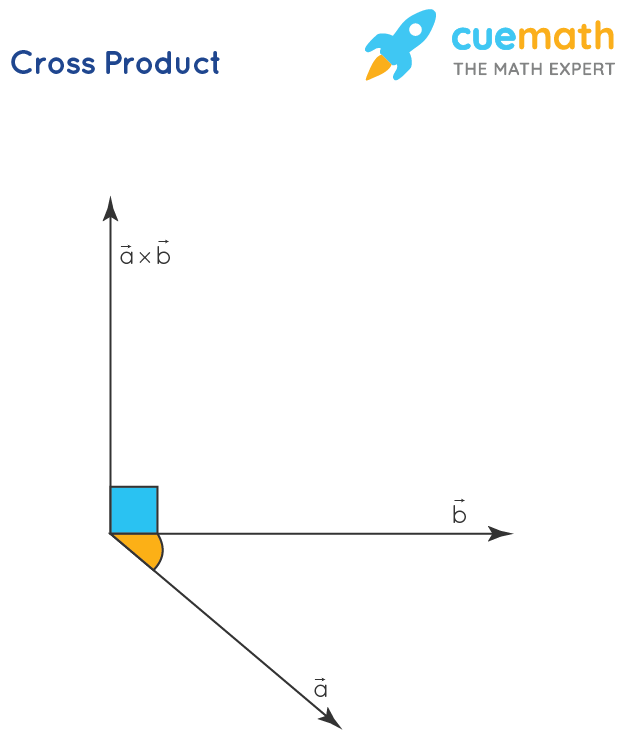

Lets say you have two vectors: $u = \langle a_{1}, a_{2}, a_{3} \rangle$ and $v = \langle b_{1}, b_{2}, b_{3} \rangle$.

The cross product between u and v would be: 

$u  x  v = |u||v| sin\theta = \langle (a_{2}*b_{3} - a_{3}*b_{2}), (a_{3}*b_{1} - a_{1}*b_{3}), (a_{1}*b_{2} - a_{2}*b_{1}) \rangle$

For example, $u = \langle 1,2,3 \rangle$ and $v = \langle 4,5,6 \rangle$, the cross product between the two vectors would be:

$\langle ((2*6)-(3*5)), ((3*4)-(1*6)), ((1*5)-(2*4)) \rangle = \langle -3, 6, -3 \rangle$

In numpy, you can use the cross function to find the cross product. 

In [11]:
u = np.array([1,2,3])
v = np.array([4,5,6])

print(np.cross(u,v))

[-3  6 -3]


## Part 3: Matrix-vector and Matrix-Matrix multiplication

For multiplication between a matrix and a vector, we need to view the vector as a column matrix, and by that I mean just a matrix with n rows and 1 column. We need to make sure the number of columns in matrix A would match the number of rows in the new column matrix, otherwise the multiplication is not possible. For example, if we have a matrix A which is an mxn matrix, we can only define multiplication with a nx1 column vector. If we let Ax=b, then b is an m×1 column vector. In other words, the number of rows in A (which can be anything) determines the number of rows in the product b. <sup>6</sup>

The same rules apply for matrix-matrix multiplication. The number of rows in the second matrix must match the number of columns in the first matrix. 

$A_{m,n} = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
 \end{pmatrix}$, $x_{n,1} = \begin{pmatrix} x_{1,1} \\ x_{2,1} \\ \vdots \\ x_{n,1} \end{pmatrix}$
 
The product between the matrix and vector would be:

$b_{m,1} = 
    \begin{pmatrix} 
    (a_{1,1}*x_{1,1})+(a_{1,2}*x_{2,1})+\cdots+(a_{1,n}*x_{n,1}) \\
    (a_{2,1}*x_{1,1})+(a_{2,2}*x_{2,1})+\cdots+(a_{2,n}*x_{n,1}) \\ 
    \vdots \\ 
    (a_{m,1}*x_{1,1})+(a_{m,2}*x_{2,1})+\cdots+(a_{m,n}*x_{n,1})
    \end{pmatrix}$
    
In numpy, you can use the `matmul` function to find the multiplication between two matrices, and a vector and matrix. 

In [12]:
# Let A be a 3x3 matrix and x be a 3x1 column vector 

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
x = np.array([2,6,9])

np.matmul(A,x)

array([ 41,  92, 143])

In [13]:
# Lets try a matrix and a vector that dont have the right combination of rows and columns. 

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
x = np.array([1,2])

try:
    np.matmul(A,x)
except ValueError: 
    dims_right = False 

assert dims_right, "The dimensions dont match"

AssertionError: The dimensions dont match

In [19]:
# Lets try multiplication between two matrices 

A = np.array([[1,2,3],[4,5,6],[7,8,9]]) # 3x3
B = np.array([[5,3],[9,0],[1,1]]) # 3x2 

np.matmul(A,B)

array([[ 26,   6],
       [ 71,  18],
       [116,  30]])

In [20]:
# Finally, lets try multiplying two vectors 

u = np.array([1,2,3])
v = np.array([4,5,6])

np.matmul(u,v)

32

In [21]:
np.matmul(u,v) == np.dot(u,v)

True

Notice, how when we used `matmul` between two vectors, it gave us the dot product between the two vectors. 

Another way to think about matrix-matrix multiplication is, lets say you have two matrices A and B, that are both a 3x3 matrix. The way multiplication works is the first row of matrix A and the first column of matrix B are vectors whose dot product equals the first value. You then find the dot product between the first row of matrix A and the second column of matrix B and so on. Hence, the matmul function gives the exact same answer as the dot product between the two vectors.

## Plots of the figures above

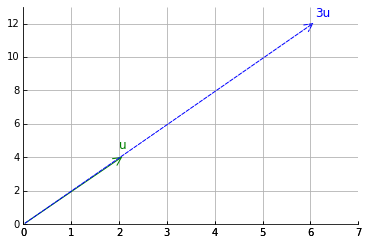

In [52]:
# Figure 3
fig = plt.figure()
ax = fig.add_subplot(axes_class=axisartist.Axes)
ax.axis["y=0"] = ax.new_floating_axis(nth_coord=0, value=0,
                                        axis_direction="bottom")
ax.axis["y=0"].toggle(all=True)
# Make other axis invisible.
ax.axis["top", "right"].set_visible(False)

ax.annotate('',
        xytext=(0,0),
        xy=(2.1,4.1),
        arrowprops=dict(arrowstyle="->", color='green'),
        size=20
    )
ax.annotate(
        xy=(2.0,4.5),
        text='u',
        size=12,
        color='green'
    )
ax.annotate('',
        xytext=(0,0),
        xy=(6.1,12.1),
        arrowprops=dict(arrowstyle="->", linestyle='--', color='blue'),
        size=20
    )
ax.annotate(
        xy=(6.1,12.4),
        text='3u',
        size=12,
        color='blue'
    )

plt.grid()
plt.xlim(0,7)
plt.ylim(0,13)
plt.show()

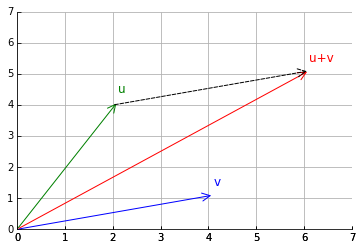

In [45]:
# Figure 2
from mpl_toolkits import axisartist
fig = plt.figure()
ax = fig.add_subplot(axes_class=axisartist.Axes)
ax.axis["y=0"] = ax.new_floating_axis(nth_coord=0, value=0,
                                        axis_direction="bottom")
ax.axis["y=0"].toggle(all=True)
# Make other axis invisible.
ax.axis["top", "right"].set_visible(False)

ax.annotate('',
        xytext=(0,0),
        xy=(2.1,4.1),
        arrowprops=dict(arrowstyle="->", color='green'),
        size=20
    )
ax.annotate(
        xy=(2.1,4.4),
        text='u',
        size=12,
        color='green'
    )
ax.annotate('',
        xytext=(0,0),
        xy=(4.1,1.1),
        arrowprops=dict(arrowstyle="->", color='blue'),
        size=20
    )
ax.annotate(
        xy=(4.1,1.4),
        text='v',
        size=12,
        color='blue'
    )
ax.annotate('',
        xytext=(0,0),
        xy=(6.1,5.1),
        arrowprops=dict(arrowstyle="->", color='red'),
        size=20
    )
ax.annotate(
        xy=(6.1,5.4),
        text='u+v',
        color='red',
        size=12
    )
ax.annotate(
    '',
    xytext=(2.0,4.0),
    xy=(6.1,5.1),
    arrowprops=dict(arrowstyle="->", linestyle="--", color='black'),
    size=20
)
plt.grid()
plt.xlim(0,7)
plt.ylim(0,7)
plt.show()

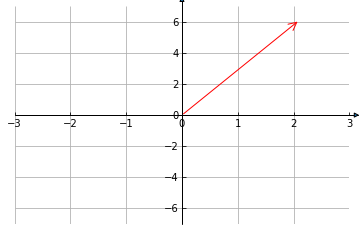

In [46]:
# Creating figure 1
import matplotlib.pyplot as plt 
from mpl_toolkits.axisartist.axislines import AxesZero

fig = plt.figure()
ax = fig.add_subplot(axes_class=AxesZero)
for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.annotate('',
        xytext=(0,0),
        xy=(2.1,6.1),
        arrowprops=dict(arrowstyle="->", color='red'),
        size=20
    )
plt.grid()
plt.xlim(-3,3)
plt.ylim(-7,7)
plt.show()

### References 

<sup>1</sup> https://en.wikipedia.org/wiki/Linear_algebra

<sup>2</sup> https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/

<sup>3</sup> https://web.stanford.edu/class/nbio228-01/handouts/Ch4_Linear_Algebra.pdf

<sup>4</sup> https://numpy.org/doc/stable/user/basics.creation.html

<sup>5</sup> https://www.cuemath.com/geometry/cross-product/

<sup>6</sup> https://mathinsight.org/matrix_vector_multiplication